# Example 3: ill-posedness
We give an example of a graph where the linearized inverse problem can be
arbitrarily ill-posed. The reason for this is that there is an edge with
gradient that is of order ε which can be made arbitrarily small.

In [1]:
using LinearAlgebra, Symbolics, Plots, Latexify
@variables ε # for symbolic computations
∇ = [ 1 0 0 0 -1  0
      0 1 0 0 -1  0
      0 0 1 0  0 -1
      0 0 0 1  0 -1
      0 0 0 0  1 -1 ]
σ = [1+ε,1,1,1,1]
𝐁 = [1,2,3,4];
𝐈 = [5,6];
n𝐈 =length(𝐈); n𝐁 = length(𝐁);
n𝐄, n𝐕 = size(∇)
f1 = [ 1, 0, 1,0];
L= ∇'*diagm(σ)*∇;
u1 = zeros(Num,6)
u1[𝐁] = f1;
u1[𝐈] = -L[𝐈,𝐈]\(L[𝐈,𝐁]*f1);
u1 = simplify.(u1);
latexify(u1[𝐈])

L"\begin{equation}
\left[
\begin{array}{c}
\frac{4 + 3 \varepsilon}{8 + 3 \varepsilon} \\
\frac{4 + 2 \varepsilon}{8 + 3 \varepsilon} \\
\end{array}
\right]
\end{equation}
"

## Calculate condition number
The condition seems to be inversely proportional to ε, so the inverse problem becomes increasingly ill-posed for smaller ε.

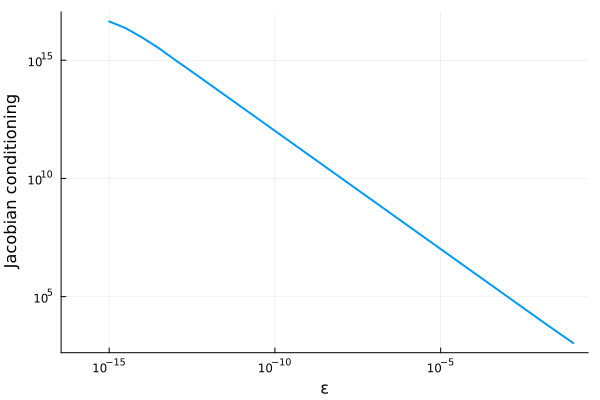

In [2]:
function condest(ε)
    σ = [1+ε,1,1,1,1]
    L(σ)= ∇'*diagm(σ)*∇;
    R𝐈= I(n𝐕)[𝐈,:] # restriction to interior nodes
    u = zeros(n𝐕)
    u[𝐁] = f1
    u[𝐈] =-L(σ)[𝐈,𝐈]\(L(σ)[𝐈,𝐁]*f1);
    # Forward problem and Jacobian
    ℒ(σ,u) = [ (L(σ)*u)[𝐈]; u[𝐁] ]
    ℳ(σ,u) = σ .* (∇*u).^2
    DℒDσ(σ,u) = [R𝐈*∇'*diagm(∇*u);zeros(n𝐁,n𝐄)]
    DℒDu(σ,u) = [L(σ)[𝐈,:];I(n𝐕)[𝐁,:]]
    DℳDσ(σ,u) = diagm((∇*u).^2)
    DℳDu(σ,u) = diagm(2σ.*(∇*u))*∇
    𝒜 = [ DℒDσ(σ,u) DℒDu(σ,u)
          DℳDσ(σ,u) DℳDu(σ,u) ]

    return cond(𝒜)
end
εs = 10.0 .^ (-1:-0.5:-16)
cs = condest.(εs)
plot(εs,cs,xaxis=:log10,yaxis=:log10,
xlabel="ε",
ylabel="Jacobian conditioning",
linewidth=2,legend=:none)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*